# MLP Lombargia - Pre processamento dos dados
Alunos:
    - Vinicius Cardoso Novaes ( vcn2@cin.ufpe.br )
    - Kennedy Edmilson Cunha Melo (kecm@cin.ufpe.br)
    - Gabriel Almeida Schneider ( gas6@cin.ufpe.br )
    - Gabriel Silva Olivera (gso@cin.ufpe.br)

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns

In [72]:
dataset = pd.read_csv('Data/Dataset_spine.csv')

In [73]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Col1         310 non-null    float64
 1   Col2         310 non-null    float64
 2   Col3         310 non-null    float64
 3   Col4         310 non-null    float64
 4   Col5         310 non-null    float64
 5   Col6         310 non-null    float64
 6   Col7         310 non-null    float64
 7   Col8         310 non-null    float64
 8   Col9         310 non-null    float64
 9   Col10        310 non-null    float64
 10  Col11        310 non-null    float64
 11  Col12        310 non-null    float64
 12  Class_att    310 non-null    object 
 13  Unnamed: 13  14 non-null     object 
dtypes: float64(12), object(2)
memory usage: 34.0+ KB


We have one unnamed column which has 14 non-null values

In [74]:
dataset.isna().sum()

Col1             0
Col2             0
Col3             0
Col4             0
Col5             0
Col6             0
Col7             0
Col8             0
Col9             0
Col10            0
Col11            0
Col12            0
Class_att        0
Unnamed: 13    296
dtype: int64

In [75]:
dataset['Unnamed: 13'].info

<bound method Series.info of 0                                                    NaN
1                                                    NaN
2      Prediction is done by using binary classificat...
3                                                    NaN
4                                                    NaN
                             ...                        
305                                                  NaN
306                                                  NaN
307                                                  NaN
308                                                  NaN
309                                                  NaN
Name: Unnamed: 13, Length: 310, dtype: object>

We will drop the Unnamed: 13 column

In [76]:
dataset = dataset.drop(['Unnamed: 13'], axis=1)

The columns name are not very informative, so using the information present at Kaggle , we will rename our columns

In [77]:
dataset.columns = [
    'pelvic_incidence',
    'pelvic tilt',
    'lumbar_lordosis_angle',
    'sacral_slope',
    'pelvic_radius',
    'degree_spondylolisthesis',
    'pelvic_slop',
    'Direct_tilt',
    'thoracic_slope',
    'cervical_tilt',
    'sacrum_angle',
    'scoliosis_slope',
    'label'
]

In [78]:
dataset.describe

<bound method NDFrame.describe of      pelvic_incidence  pelvic tilt  lumbar_lordosis_angle  sacral_slope  \
0           63.027817    22.552586              39.609117     40.475232   
1           39.056951    10.060991              25.015378     28.995960   
2           68.832021    22.218482              50.092194     46.613539   
3           69.297008    24.652878              44.311238     44.644130   
4           49.712859     9.652075              28.317406     40.060784   
..                ...          ...                    ...           ...   
305         47.903565    13.616688              36.000000     34.286877   
306         53.936748    20.721496              29.220534     33.215251   
307         61.446597    22.694968              46.170347     38.751628   
308         45.252792     8.693157              41.583126     36.559635   
309         33.841641     5.073991              36.641233     28.767649   

     pelvic_radius  degree_spondylolisthesis  pelvic_slop  Direct

In [79]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   pelvic_slop               310 non-null    float64
 7   Direct_tilt               310 non-null    float64
 8   thoracic_slope            310 non-null    float64
 9   cervical_tilt             310 non-null    float64
 10  sacrum_angle              310 non-null    float64
 11  scoliosis_slope           310 non-null    float64
 12  label                     310 non-null    object 
dtypes: float64(12), object(1)
memory usage: 31.6+ KB


In [80]:
dataset.describe(include='all')

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slop,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,label
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abnormal
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,210
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,0.472979,21.321526,13.064511,11.933317,-14.053139,25.645981,NaN
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,0.285787,8.639423,3.399713,2.893265,12.225582,10.450558,NaN
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.003220,7.027000,7.037800,7.030600,-35.287375,7.007900,NaN
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,0.224367,13.054400,10.417800,9.541140,-24.289522,17.189075,NaN
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,0.475989,21.907150,12.938450,11.953835,-14.622856,24.931950,NaN
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,0.704846,28.954075,15.889525,14.371810,-3.497094,33.979600,NaN


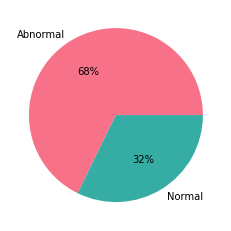

In [81]:
plt.pie(list(dataset.label.value_counts().to_dict().values()),
        labels=list(dataset.label.value_counts().to_dict().keys()),
        colors=sns.color_palette('husl',2),
        autopct='%.0f%%')
plt.show()

Our dataset it's unbalanced. We expect that this may affect our model perform

Let's verify the data types present in our dataset. In order to run our MLP model we need to have only float numbers

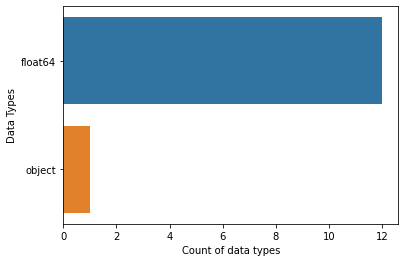

In [82]:
sns.countplot(y=dataset.dtypes, data=dataset)
plt.xlabel("Count of data types")
plt.ylabel("Data Types")
plt.show()

And now we will replace the object values by float values

In [83]:
dataset['label'].head

<bound method NDFrame.head of 0      Abnormal
1      Abnormal
2      Abnormal
3      Abnormal
4      Abnormal
         ...   
305      Normal
306      Normal
307      Normal
308      Normal
309      Normal
Name: label, Length: 310, dtype: object>

In [84]:
dataset['label_val'] = preprocessing.LabelEncoder().fit_transform(
    dataset['label']
)

In [85]:
dataset['label_val'].head

<bound method NDFrame.head of 0      0
1      0
2      0
3      0
4      0
      ..
305    1
306    1
307    1
308    1
309    1
Name: label_val, Length: 310, dtype: int32>

So in the ```label val``` column we have 1 for normal and 0 for abnormal

Now we will check the distribution of the features

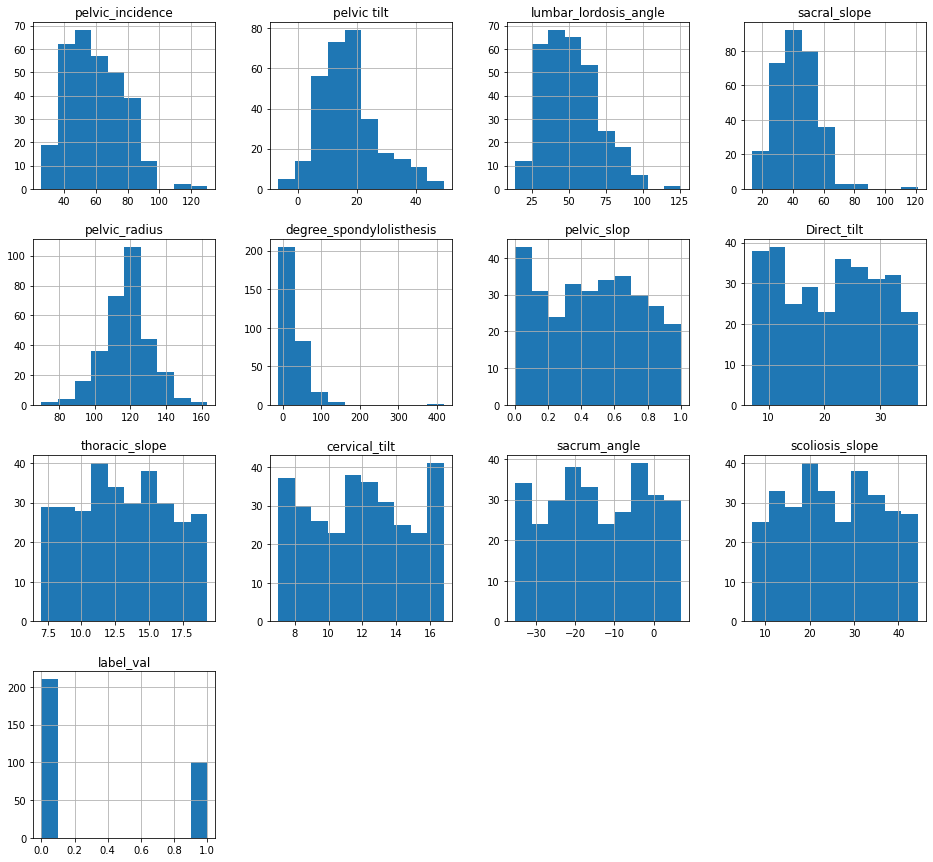

In [86]:
dataset.hist(figsize=(16,15))
plt.title("Features distribution")
plt.show()

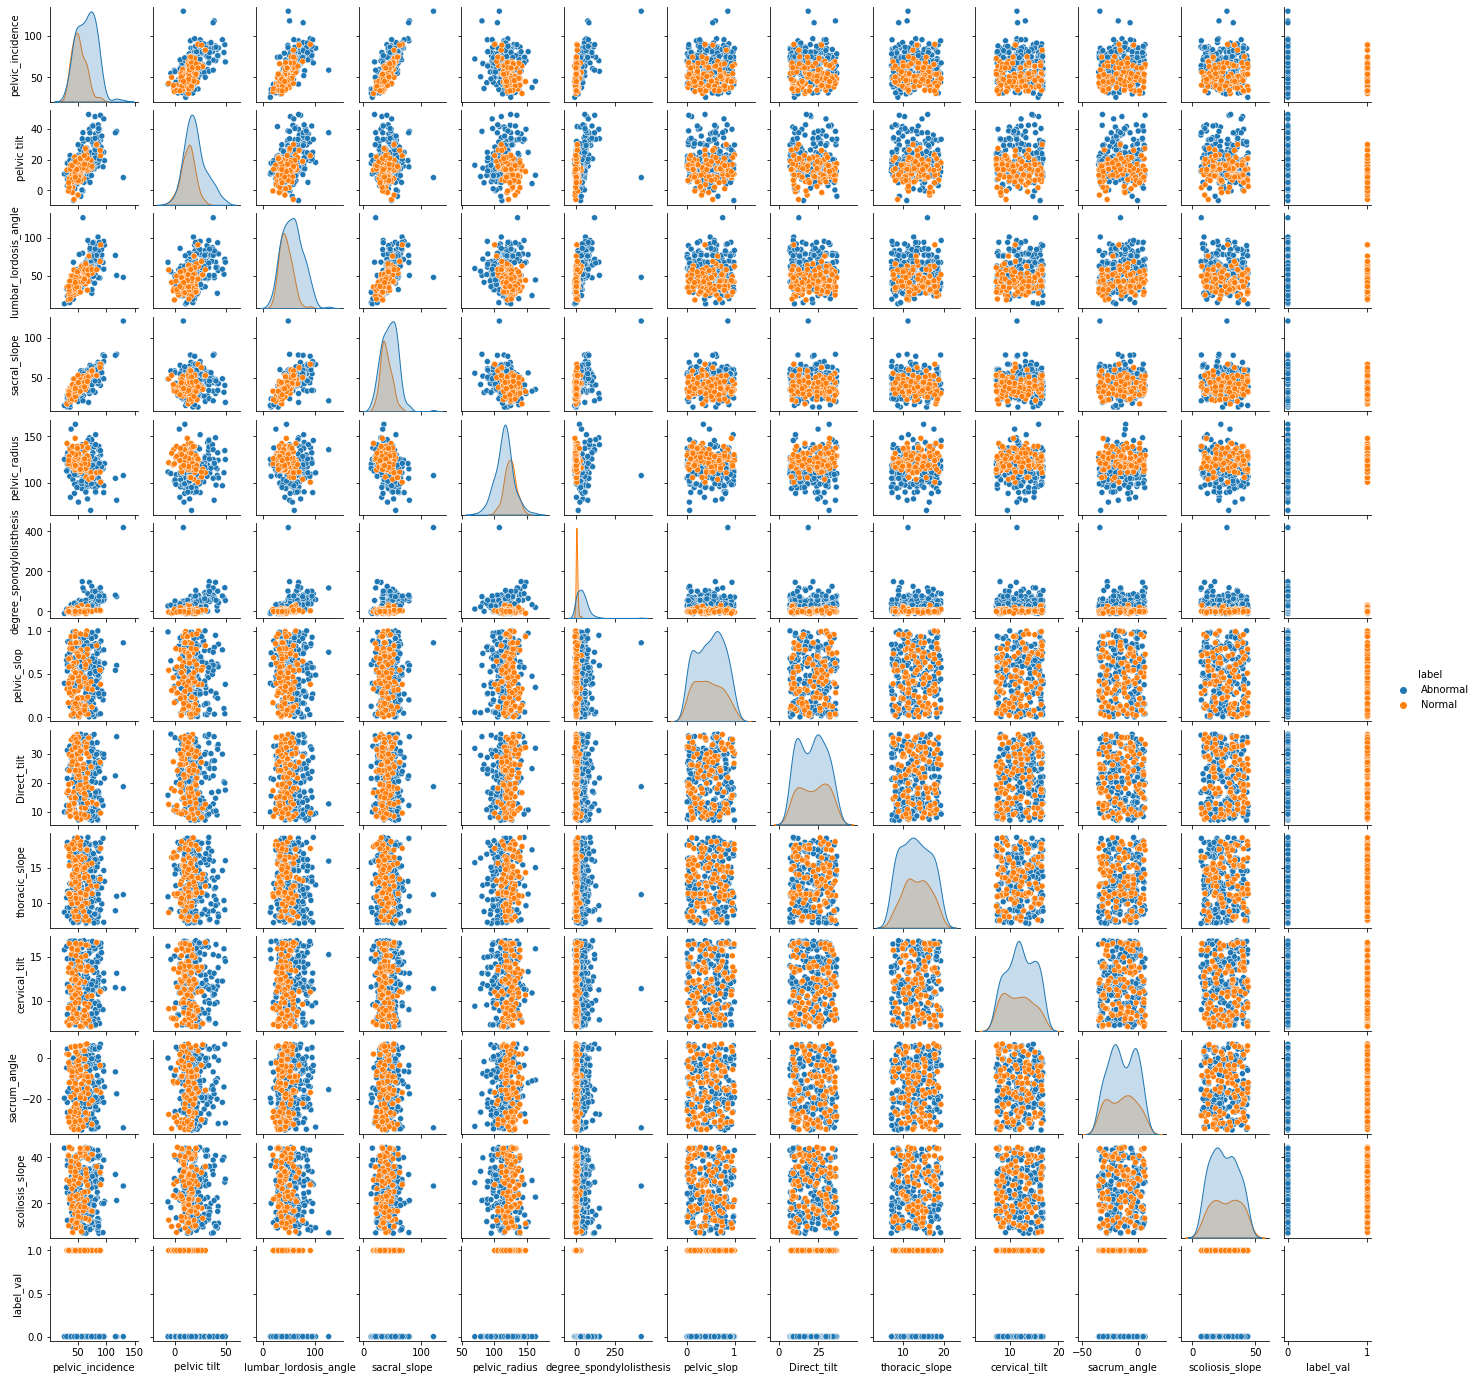

In [87]:
sns.pairplot(dataset,height=1.5, hue='label')

Now we can verify the relation between features

<AxesSubplot:>

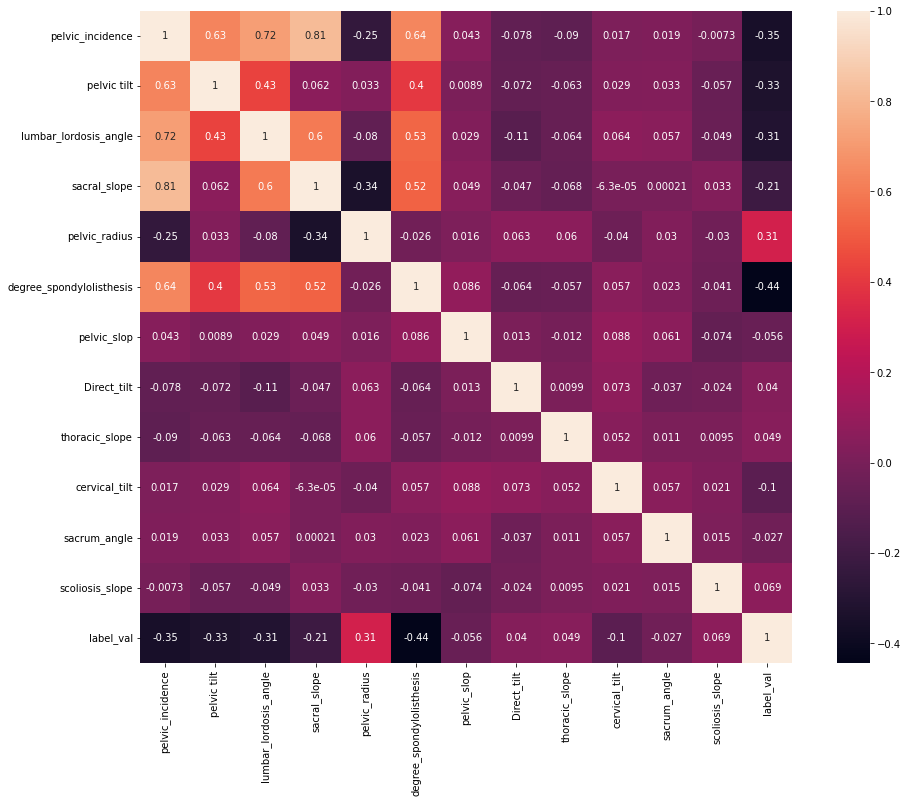

In [88]:
plt.subplots(figsize=(16,12))
sns.heatmap(
    dataset.corr(),
    annot=True,
    square=True,
    cbar=True
)

In [89]:
dataset.isna().sum()

pelvic_incidence            0
pelvic tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
pelvic_slop                 0
Direct_tilt                 0
thoracic_slope              0
cervical_tilt               0
sacrum_angle                0
scoliosis_slope             0
label                       0
label_val                   0
dtype: int64

Now we can export our clean dataset

In [90]:
dataset.to_csv('Data/dataset_spine_clean.csv')